In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical



In [10]:
cd /content/drive/MyDrive/ML


/content/drive/MyDrive/ML


In [11]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=dbe13137516bf9be20a157ae97e173790d560a869c18c8c846b21b0712e57948
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [12]:
import wget
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
wget.download(link)

'traffic-signs-data (1).zip'

In [13]:
!unzip /content/drive/MyDrive/ML/traffic-signs-data.zip 

Archive:  /content/drive/MyDrive/ML/traffic-signs-data.zip
replace test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.p                  
replace train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.p                 y

replace valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: valid.p                 y



In [14]:
train_link = "/content/drive/MyDrive/ML/train.p"
valid_link = "/content/drive/MyDrive/ML/valid.p"
test_link = "/content/drive/MyDrive/ML/test.p"



In [15]:
import pickle
with open(train_link,mode="rb") as f:
  train = pickle.load(f)
with open(valid_link,mode="rb") as f:
  valid = pickle.load(f)
with open(test_link,mode="rb") as f:
  test = pickle.load(f)

In [16]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [65]:
trainX = train["features"]
trainY = train["labels"]
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

In [68]:
trainX = trainX.astype(float)/255
validX = validX.astype(float)/255
testX = testX.astype(float)/255
trainY = to_categorical(trainY)
validY = to_categorical(validY)
testY = to_categorical(testY)

In [20]:
width = 32
hieght = 32
shape=(width,hieght,3)

In [48]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=shape,activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding="same",activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(43,activation="softmax"))


#model.add(BatchNormalization())




In [49]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_34 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_35 (Batc (None, 16, 16, 64)      

In [64]:
aug = ImageDataGenerator(rotation_range=0.1,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
learning_rate = 0.01
epoch = 10
batch_size = 64
opt = SGD(learning_rate=learning_rate,momentum=0.9)



In [69]:
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
h = model.fit(trainX,trainY,batch_size=64,epochs=10,verbose=1,validation_data=(validX,validY))


Epoch 1/10
544/544 [==============================] - 42s 20ms/step - loss: 0.6587 - accuracy: 0.8090 - val_loss: 0.2777 - val_accuracy: 0.9236
Epoch 2/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.1683 - val_accuracy: 0.9569
Epoch 3/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0219 - accuracy: 0.9939 - val_loss: 0.1941 - val_accuracy: 0.9569
Epoch 4/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.1350 - val_accuracy: 0.9587
Epoch 5/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.1154 - val_accuracy: 0.9689
Epoch 6/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.1197 - val_accuracy: 0.9676
Epoch 7/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.1467 - val_accuracy:

In [77]:
model.save("myModel.h5")
from matplotlib import pyplot as plt
import numpy as np

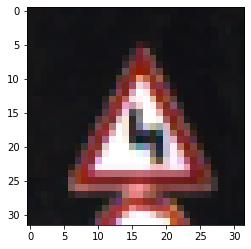

Double curve


In [80]:
plt.imshow(test["features"][80])
plt.show()
result = model.predict(testX[80:81])
result = np.argmax(result)
result = classNames[result]
print(result)